In [108]:
import plots
import statistics
import importlib
importlib.reload(plots)

from marketenvironment import MarketEnvironment
from simulation import run_episode

TEST = False

# RL-Environment

In [45]:
if TEST:
    print("Createing test environment...")
else:
    print("Loading simulation results from files...")

Loading simulation results from files...


In [46]:
if TEST:
    sim_env = MarketEnvironment(num_agents=5, costs=5, sigma=2)
    steps = 8000
    print(f"Running simulation for {steps} steps...")
    sim_env, round_info, q_snapshots, snap_steps = run_episode(sim_env=sim_env, max_steps=steps)

In [50]:
if TEST:
    import json
    import numpy as np

    def json_serial(obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        raise TypeError(f"Type {type(obj)} not serializable")

    with open("output/round_info_dynamik.json", "w") as f:
        json.dump(round_info, f, default=json_serial, indent=2)

    # write q_snapshots to json file
    with open("output/q_snapshots_dynamik.json", "w") as f:
        json.dump(q_snapshots, f, default=json_serial, indent=2)

    with open("output/snap_steps_dynamik.json", "w") as f:
        json.dump(snap_steps, f, default=json_serial, indent=2)
else:
    import json

    with open("output/round_info_dynamik.json", "r") as f:
        round_info = json.load(f)
    round_info = {int(k): v for k, v in round_info.items()}

    with open("output/q_snapshots_dynamik.json", "r") as f:
        q_snapshots = json.load(f)

    with open("output/snap_steps_dynamik.json", "r") as f:
        snap_steps = json.load(f)

Mean, Standardabweichung und Verhältnis dieser beiden Werte der Rewards

In [127]:
inner_dict = round_info[0]
rz_keys = [key for key in inner_dict.keys() if key.startswith("RZ")]
steps = sorted(round_info.keys())

print(f"{'RZ':<6} {'Mean':>12} {'Stdabw.':>12} {'Std/Mean':>12}")
print("-" * 46)

for rz in rz_keys:
    rewards = [round_info[s][rz]["actual_reward"] for s in steps]
    mean = statistics.mean(rewards)
    stdev = statistics.stdev(rewards)
    print(f"{rz:<6} {mean:12.2f} {stdev:12.2f} {stdev/mean:12.4f}")

RZ             Mean      Stdabw.     Std/Mean
----------------------------------------------
RZ1            3.37         3.49       1.0362
RZ2            3.41         3.42       1.0030
RZ3            3.44         3.39       0.9863
RZ4            3.36         3.34       0.9941
RZ5            3.46         3.38       0.9767


Unterschiede beim Mean Reward liegen bei < 0.07.

Interpretation:
- Kein Agent dominiert langfristig
- Keine systematische Benachteiligung
- Dein Mechanismus ist symmetrisch / fair

Standardabweichung $`\sigma`$ ~ 3.3–3.5

Verglichen mit dem Mittelwert ($`\mu`$~3.45):

$`\frac{\sigma}{\mu}`$~1

=> Die Rewards schwanken stark von Runde zu Runde.

a) Kosten sind zufällig
- Kosten ~ Normal(5, 2), abgeschnitten auf [1, 10]
- Jede Runde komplett neue Realisation
- → Einkommen stark zufallsgetrieben

b) Marktpreis schwankt
- Preis = ⌈Mittelwert der aktuellen Kosten⌉
- → Preis variiert ebenfalls zufällig
- → Earnings = Preis − Kosten ist volatil

c) Wettbewerb & Bieten
- Ob du gewinnst / verlierst ist stochastisch
- Selbst bei gleicher Strategie

Warum Mean positive (~3.4)?

Erwartungswert grob:
- Kostenmittel: 5
- Marktpreis: ≈ 5–6 (ceil des Mittels)
- Earnings ≈ 0–1 pro Job
- Durch Bieten / Marktmechanismus kommt zusätzlicher Gewinn

👉 Der Markt erzeugt systematisch positiven Überschuss für Agenten.

Das bedeutet:
- Das System ist nicht „zero-sum“
- Es gibt positiven social welfare

Barplot: Ausgabe pro Agent auf dem Markt

Plot: Total paid on market per Agent


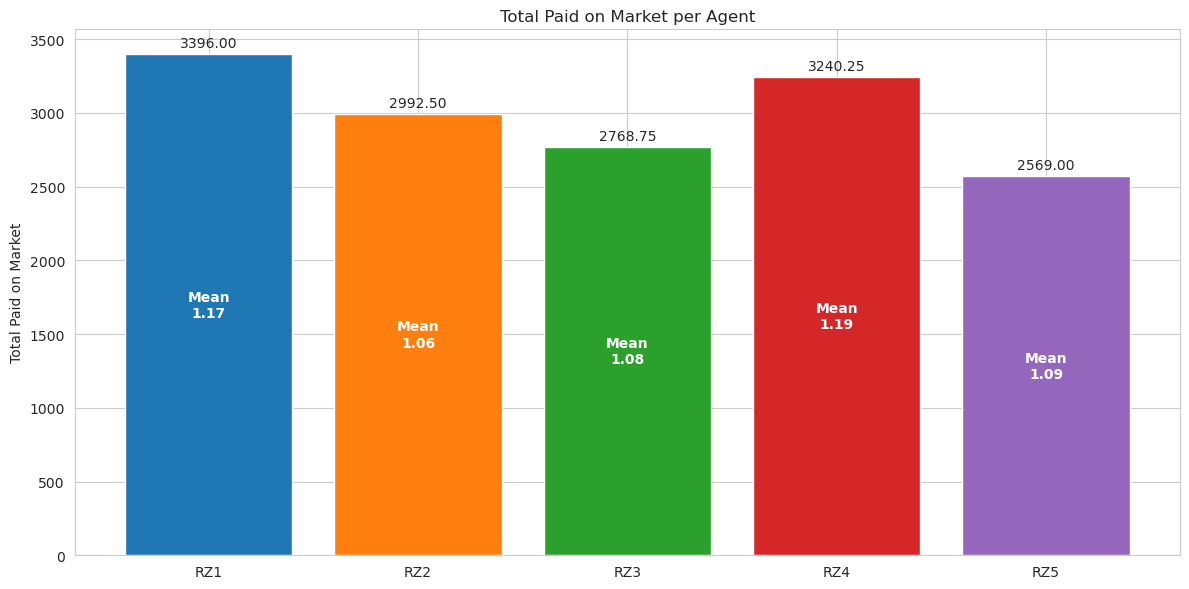

In [112]:
print("Plot: Total paid on market per Agent")
plots.plot_paid_on_market(round_info)

Barplot: Gewinn pro Agent über alle Runden

Plotting Cumulative Rewards


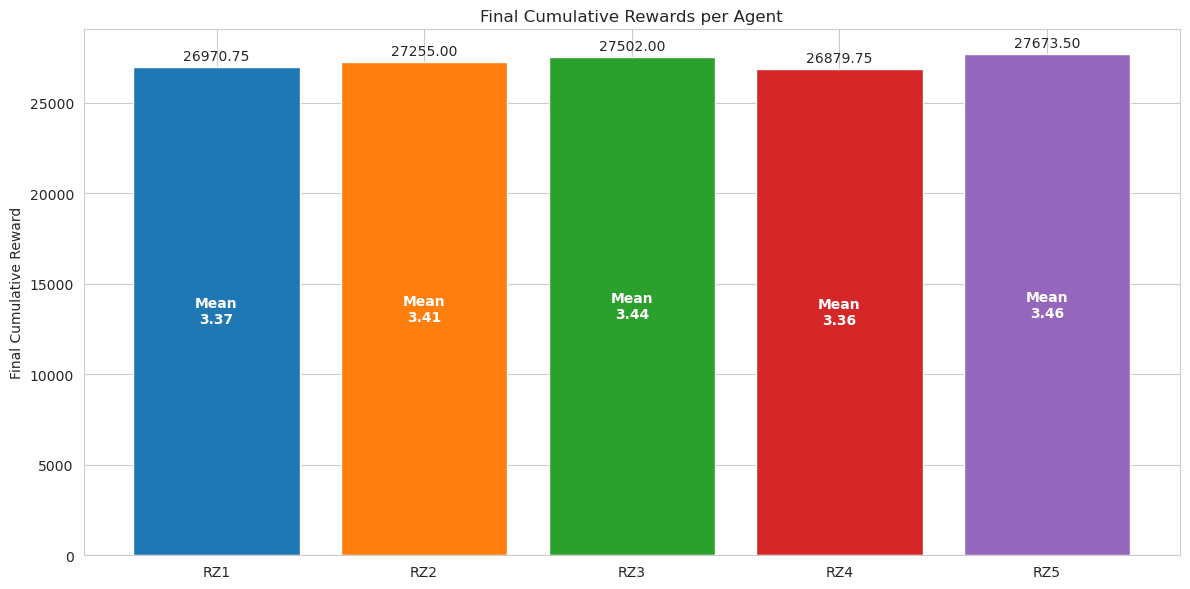

In [109]:
print("Plotting Cumulative Rewards")
plots.plot_cumulative_rewards(round_info)

Barplot: Anzahl bearbeiteter Aufträge pro Agent

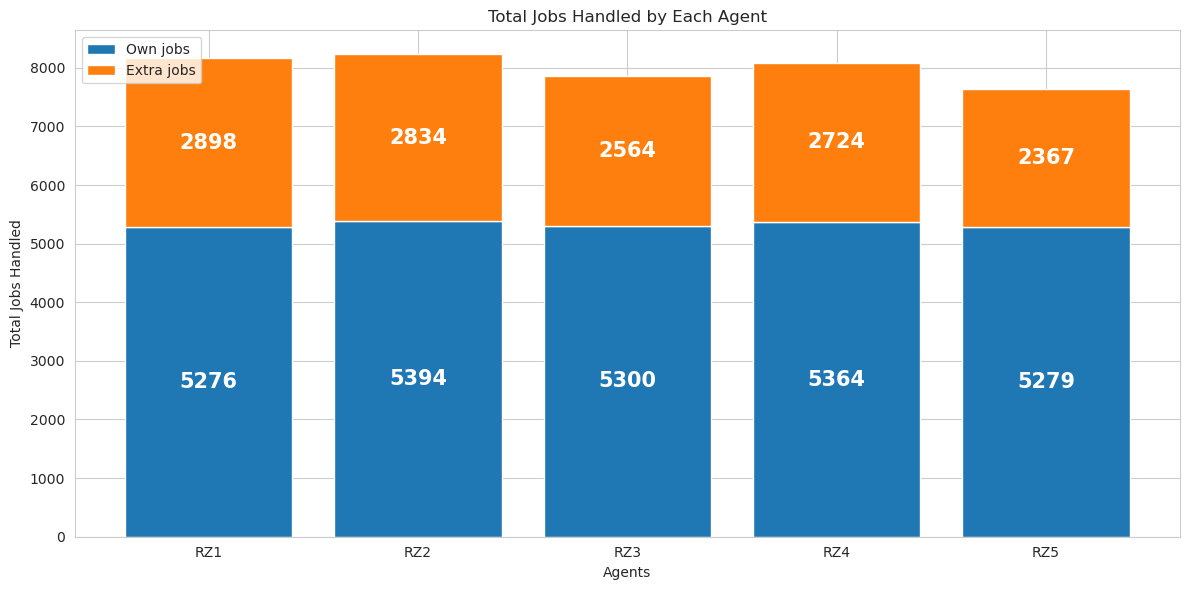

In [54]:
plots.plot_processed_jobs(round_info)

Barplot: Anzahl bearbeiteter fremder Aufträge pro Agent

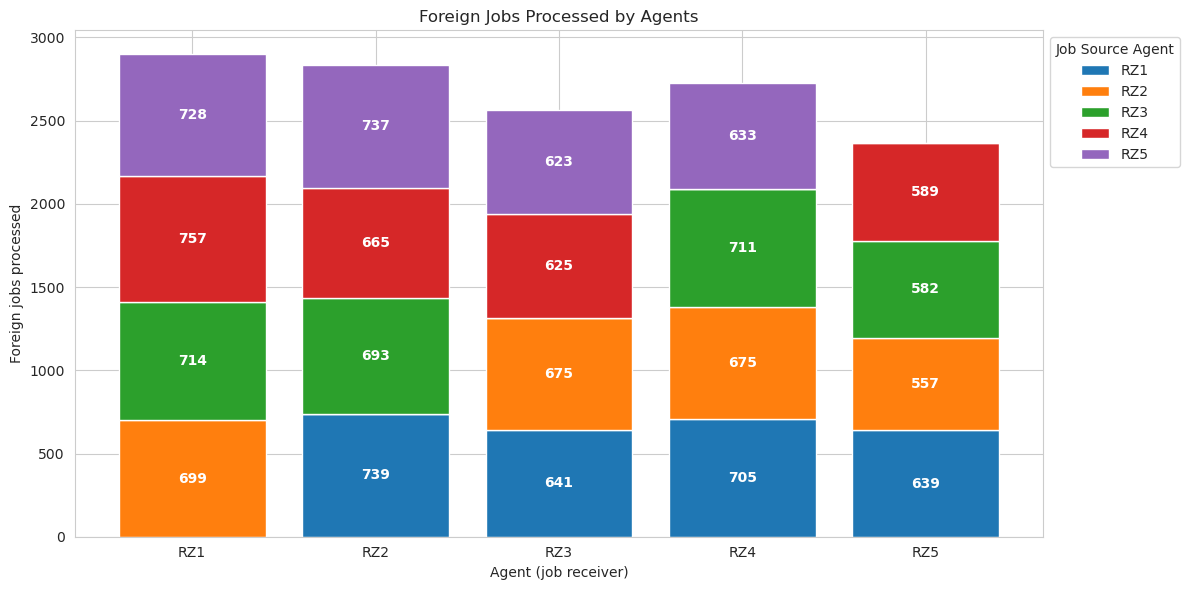

In [55]:
plots.plot_processed_foreign_jobs(round_info)

Barplot: Bearbeitung gegen inserierung pro Agent

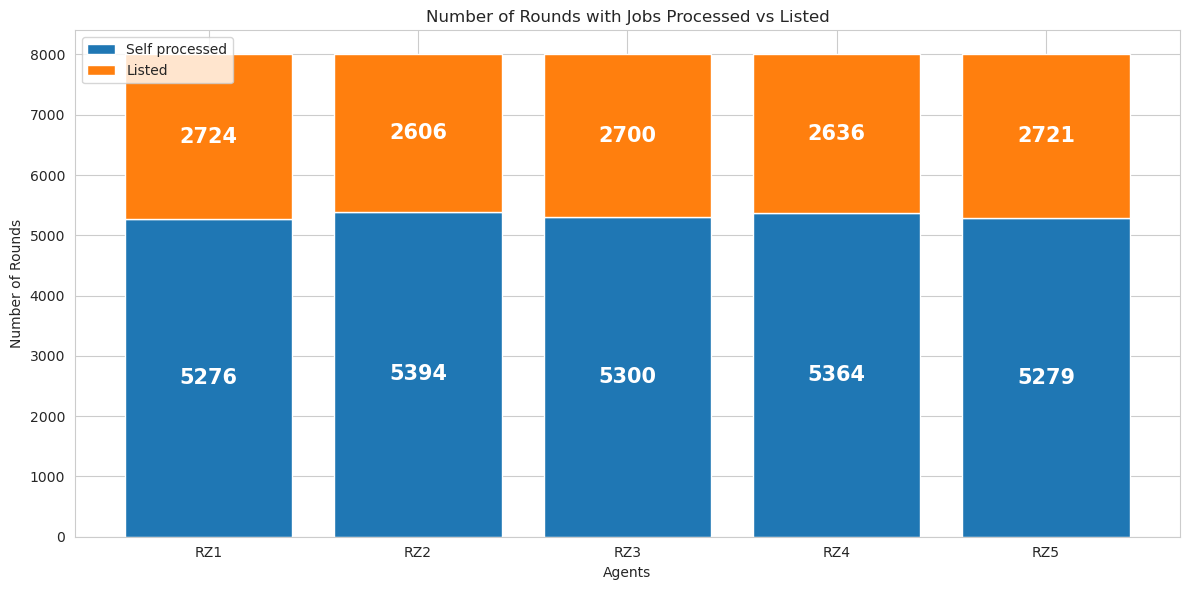

In [56]:
plots.plot_processed_vs_listed(round_info)

Lineplot: Preis über die Runden

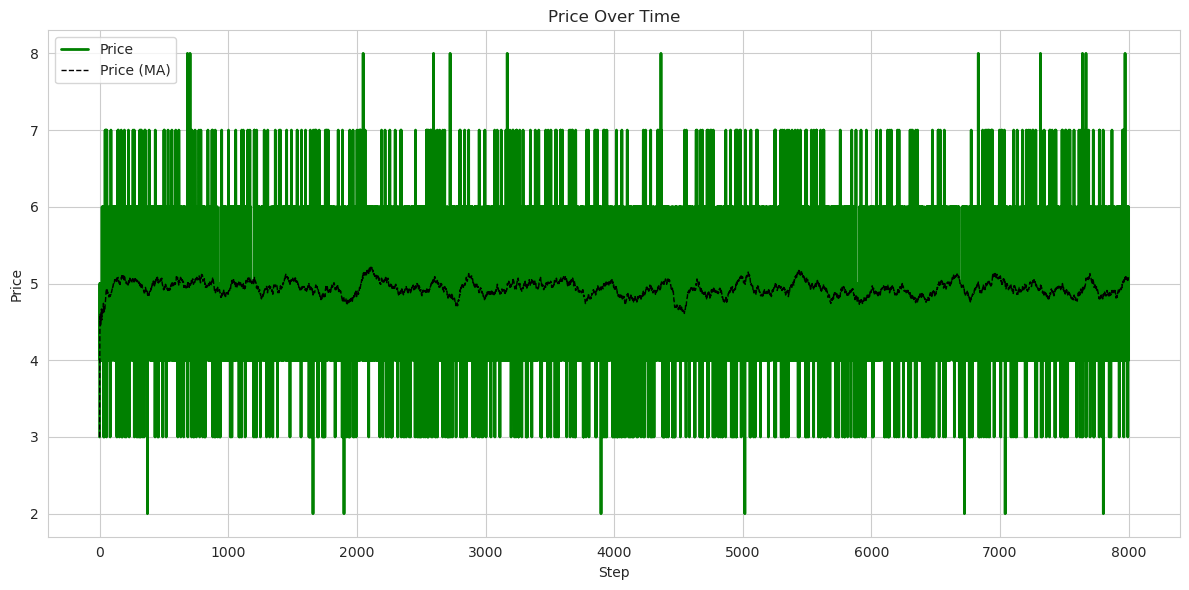

In [57]:
plots.plot_price(round_info)

Heatmap: Q-Table der Agenten

Plotting Q-Tables
Agent RZ1


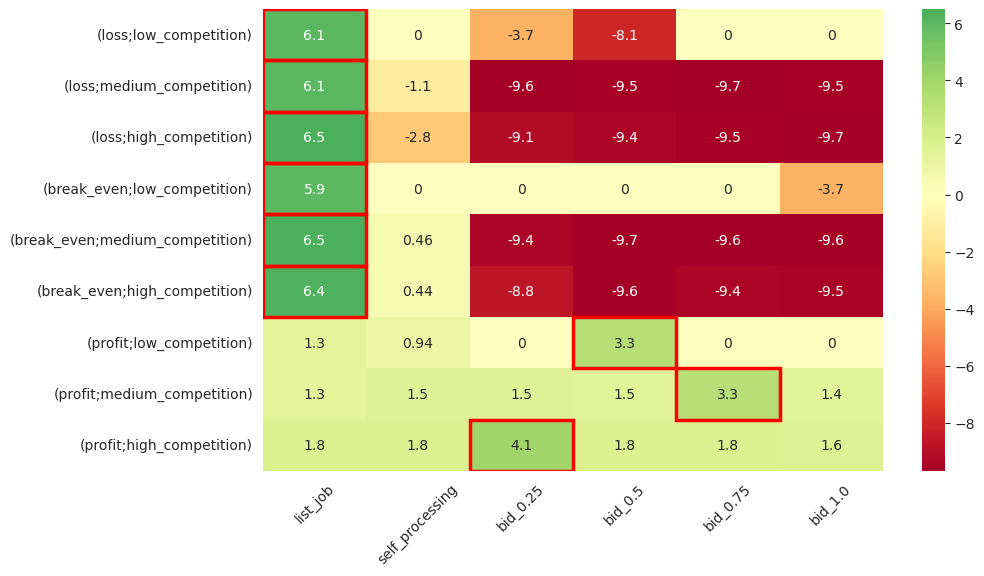

Agent RZ2


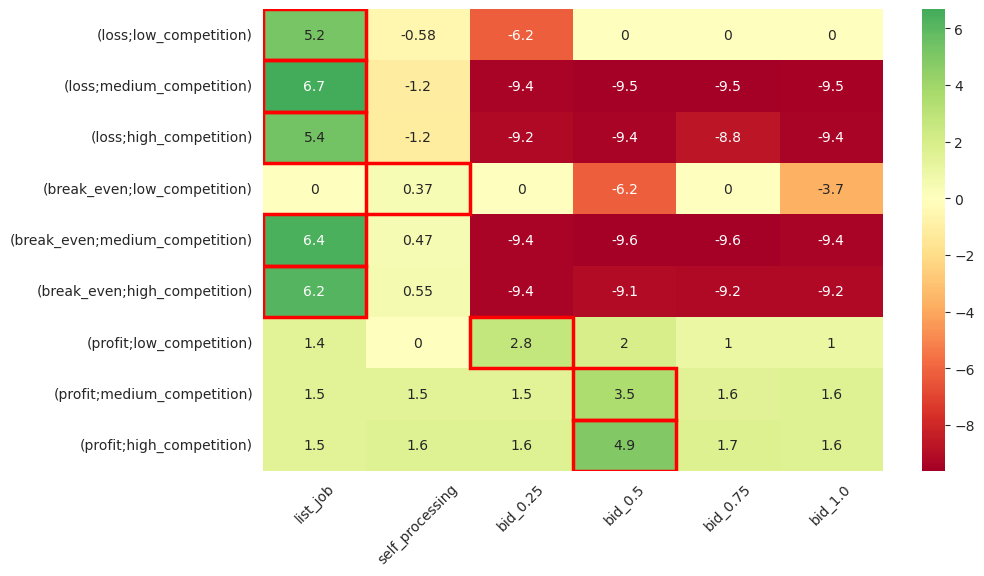

Agent RZ3


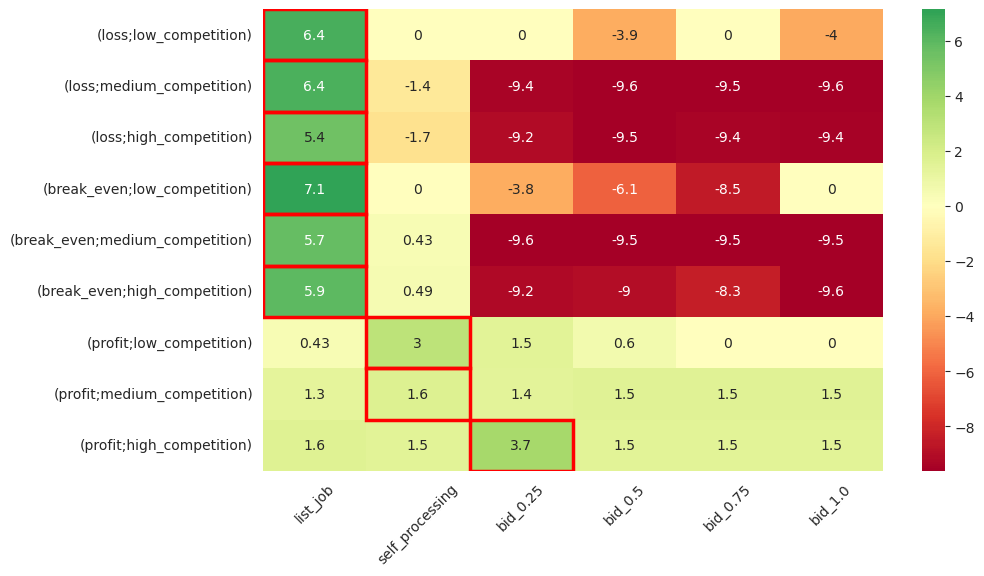

Agent RZ4


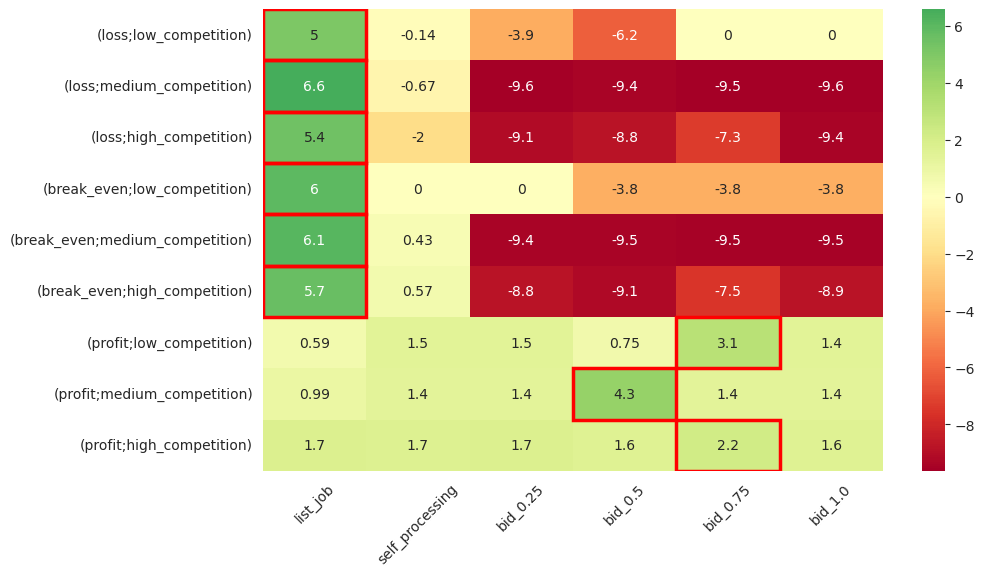

Agent RZ5


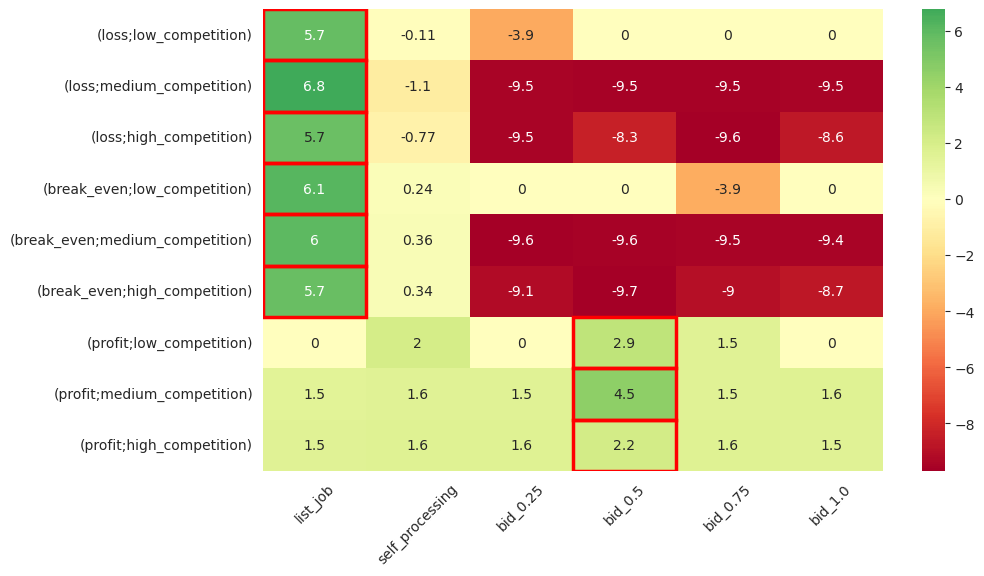

In [58]:
print("Plotting Q-Tables")
for agent in q_snapshots.keys():
    print(f"Agent {agent}")
    plots.plot_q_tables(q_snapshots[agent][-1])

Lineplot: Rewards pro Runde und Agent

Plotting Rewards
RZ1


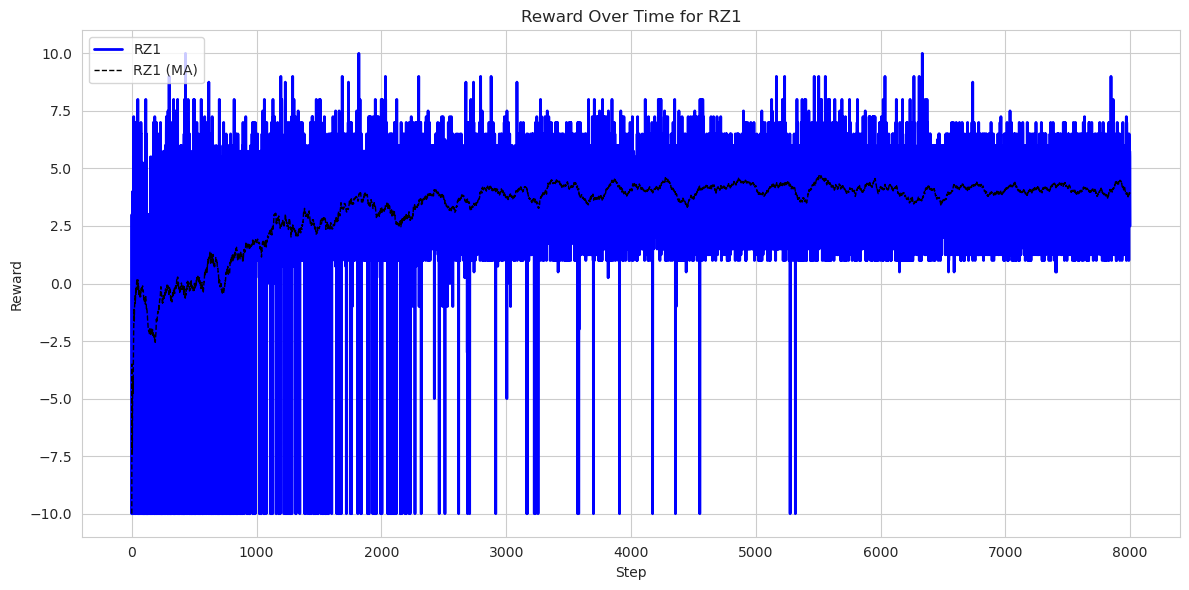

RZ2


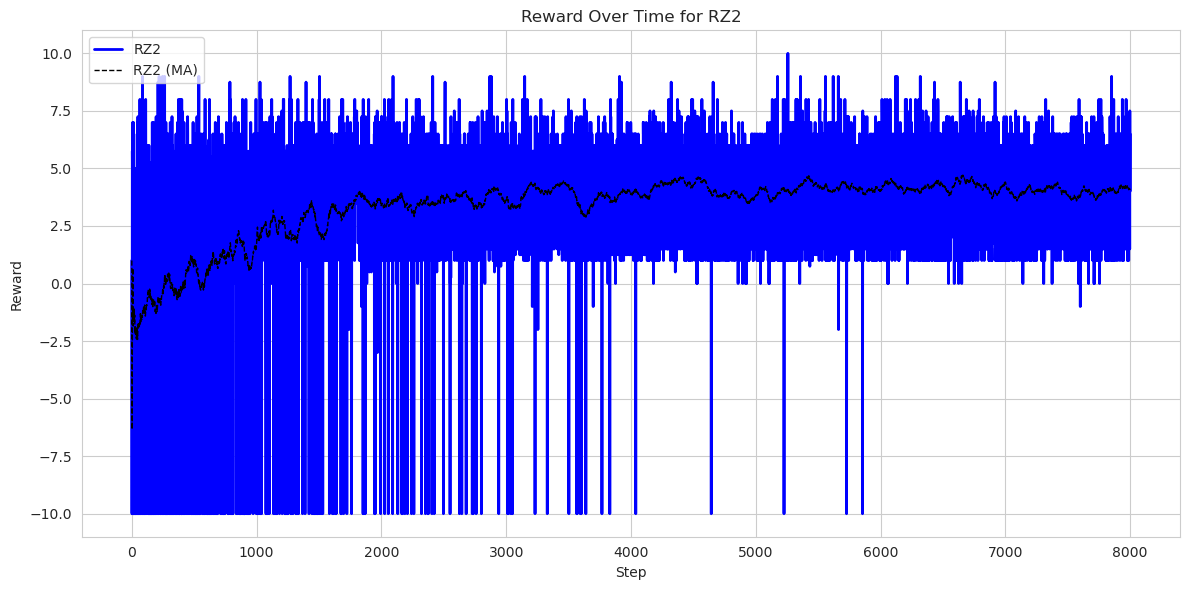

RZ3


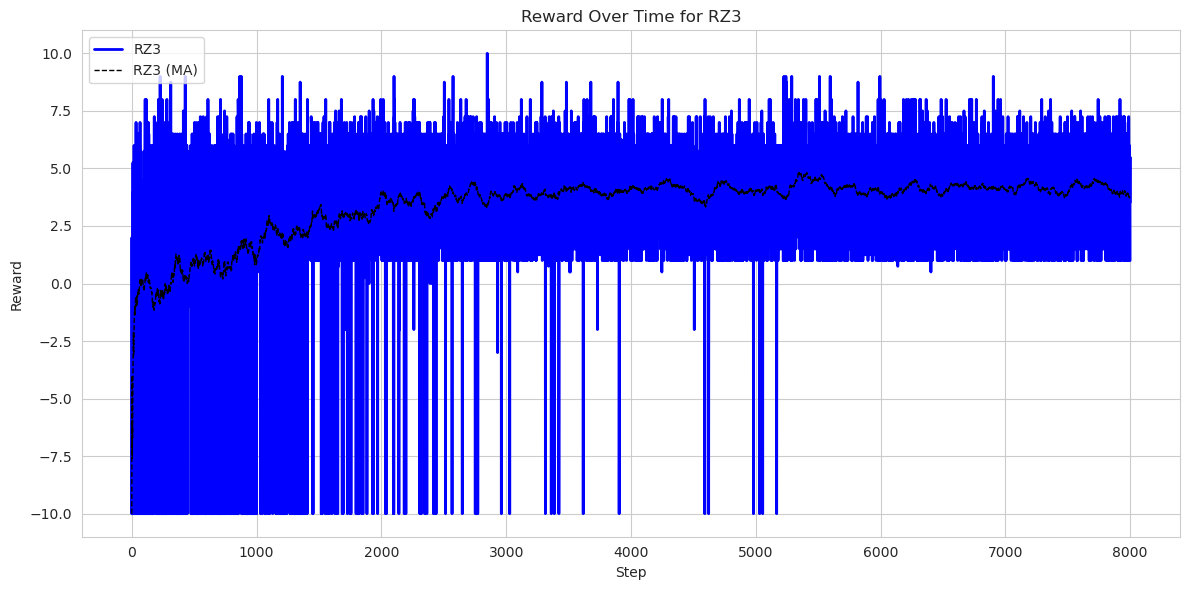

RZ4


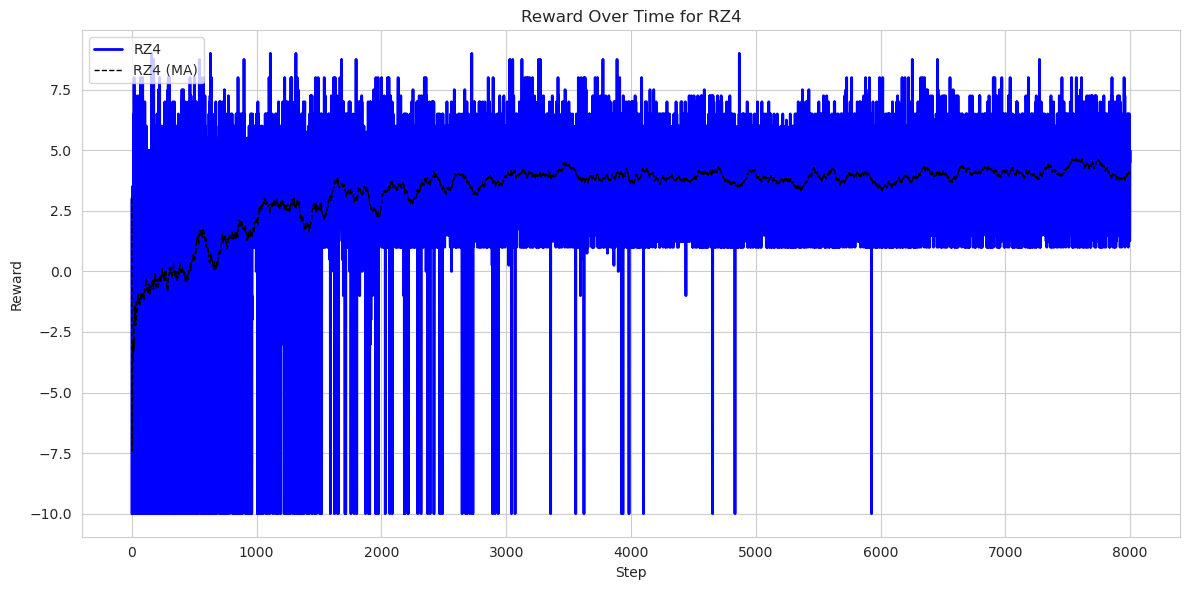

RZ5


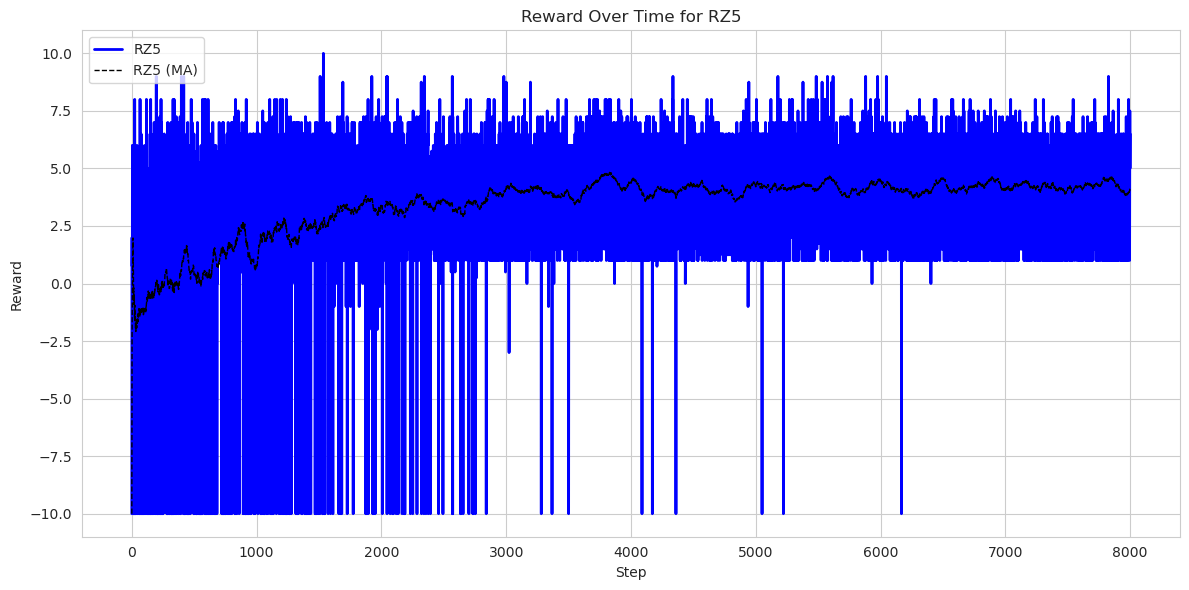

In [93]:
print("Plotting Rewards")
for agent in round_info[0].keys():
    if agent.startswith("RZ"):
        plots.plot_reward_for(agent, round_info)

Lineplot: Durchschnitts-Reward pro Agent über Zeit

Plotting Rewards


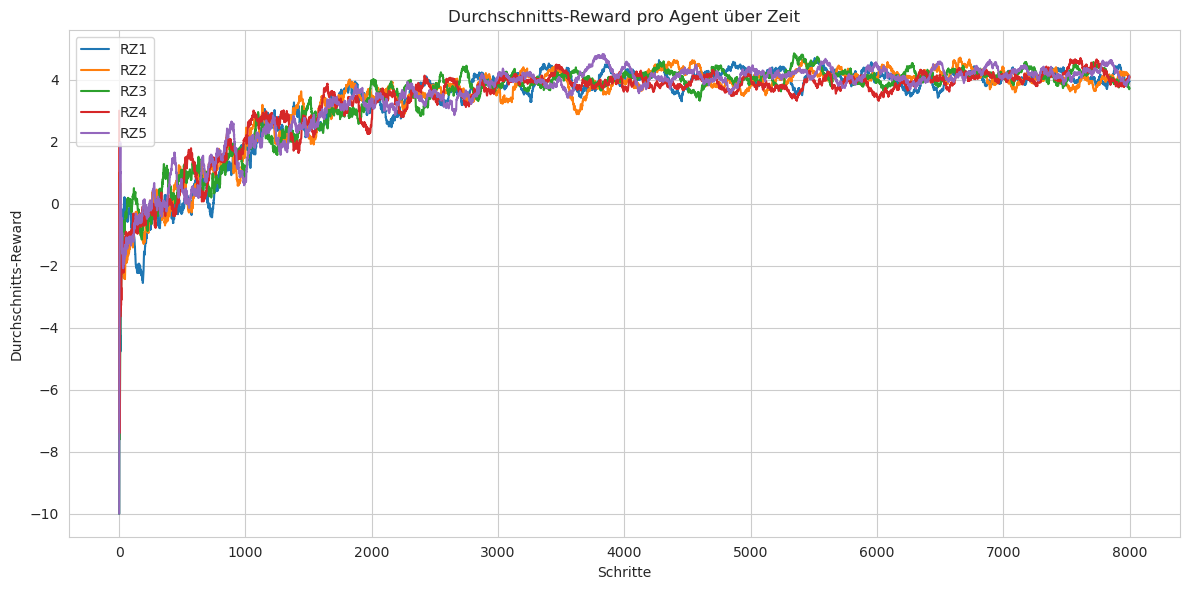

In [120]:
print("Plotting Rewards")
plots.plot_average_rewards(round_info)

Lineplot: Rewards und Social Welfare pro Runde

mean_reward


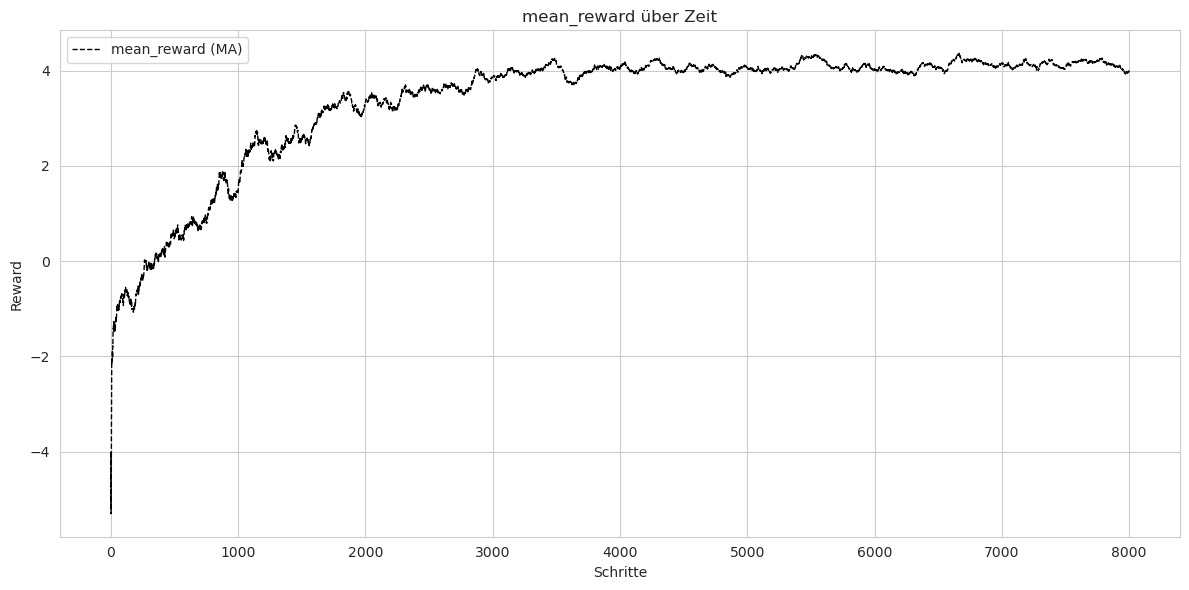

social_welfare


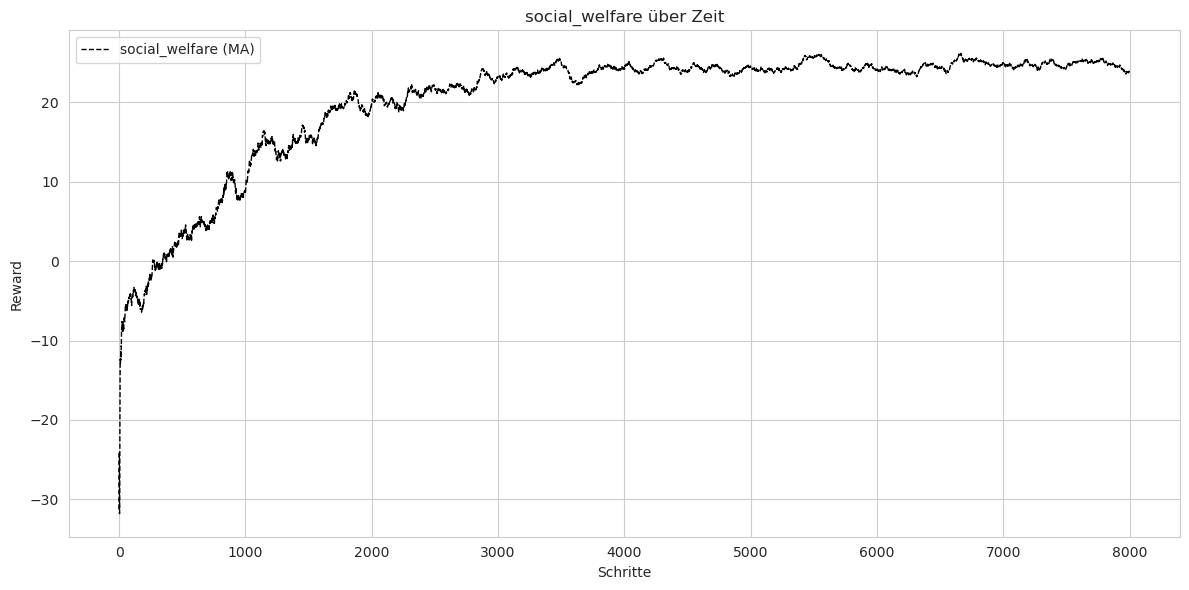

In [124]:
plots.plot_reward_for("mean_reward", round_info, only_ma=True)
plots.plot_reward_for("social_welfare", round_info, only_ma=True)

Lineplot: Q-Table Konvergenz pro Agent

Plotting Q-Table Convergance


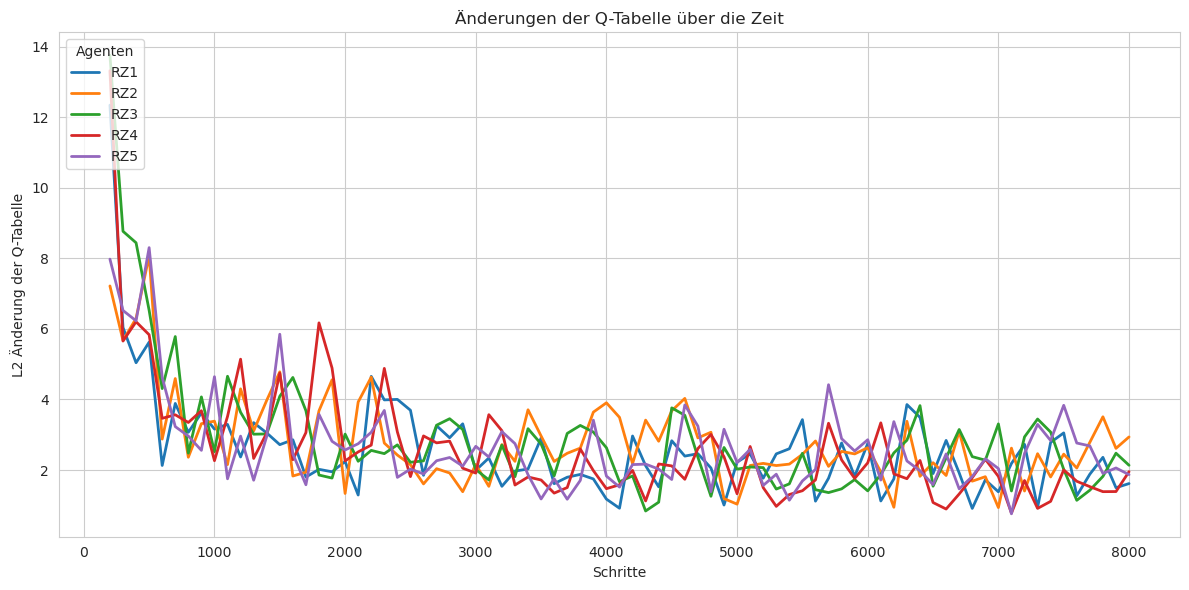

In [126]:
print("Plotting Q-Table Convergance")
plots.plot_q_convergance(q_snapshots, snap_steps)